In [1]:
%pip install opencv-python -q
%pip install matplotlib -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import matplotlib.pyplot as plt

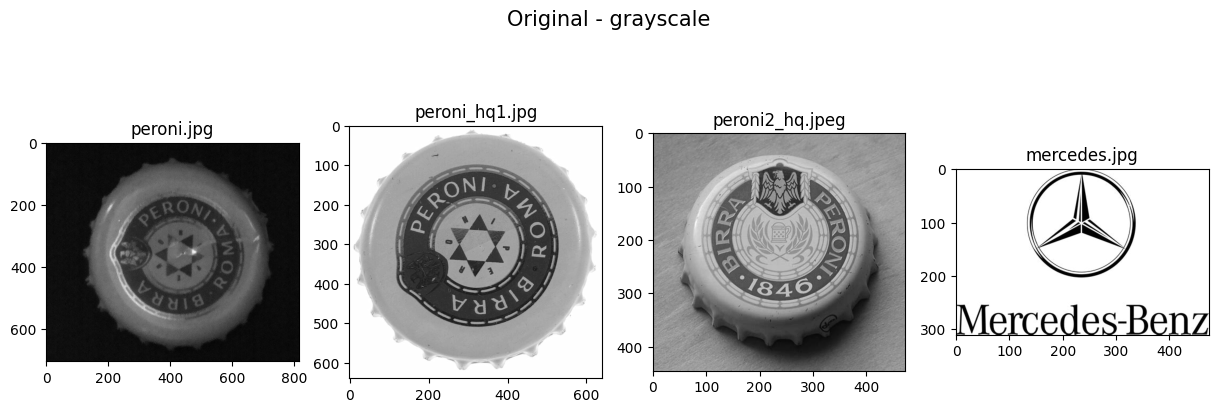

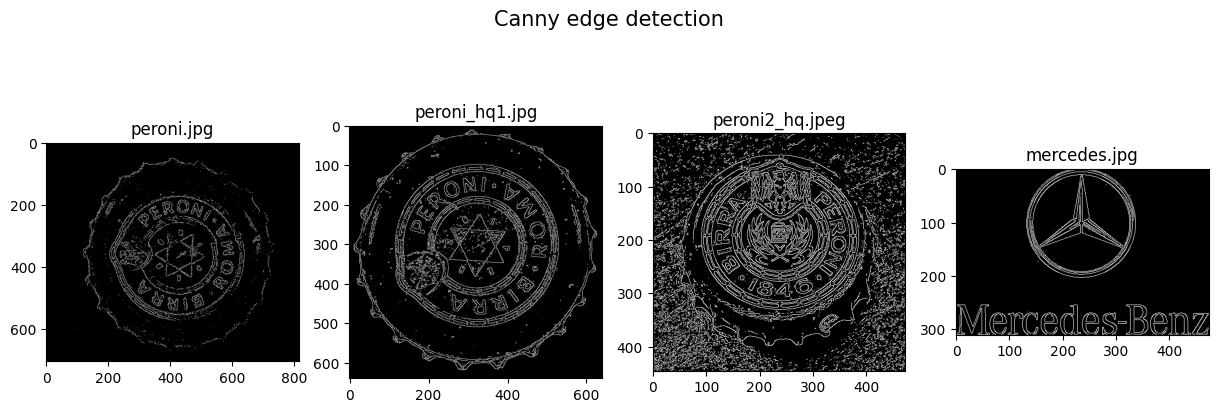

peroni.jpg -> peroni_hq1.jpg: 361


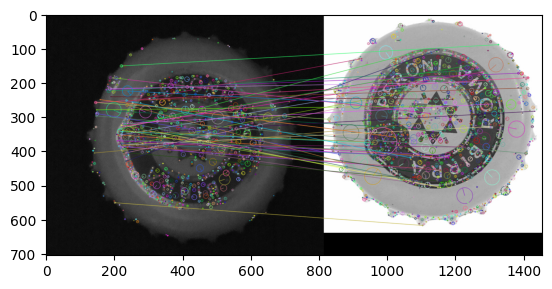

peroni.jpg -> peroni2_hq.jpeg: 381


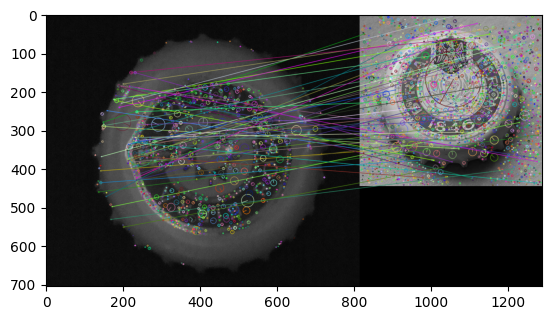

peroni.jpg -> mercedes.jpg: 93


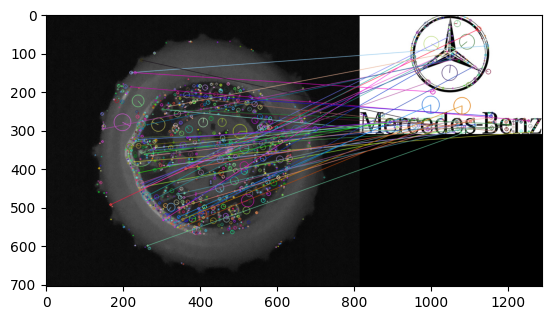

peroni_hq1.jpg -> peroni.jpg: 361


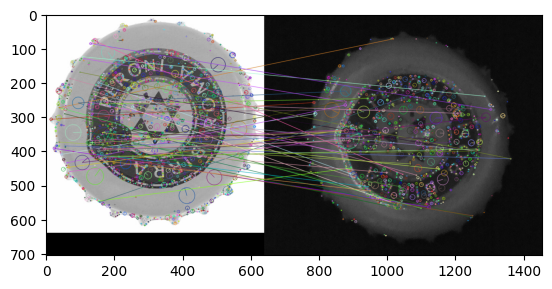

peroni_hq1.jpg -> peroni2_hq.jpeg: 498


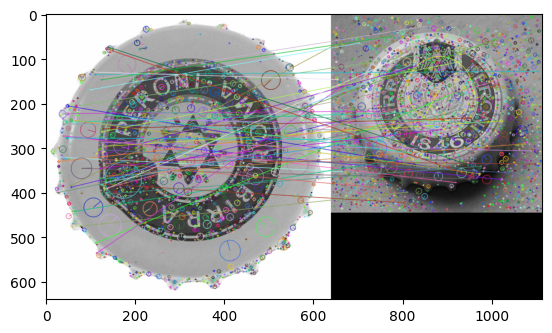

peroni_hq1.jpg -> mercedes.jpg: 113


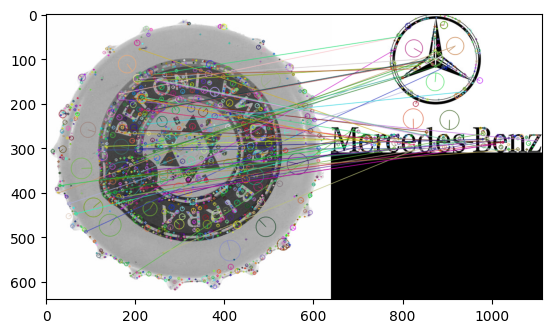

peroni2_hq.jpeg -> peroni.jpg: 381


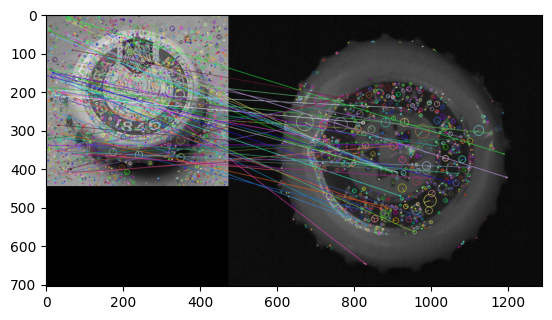

peroni2_hq.jpeg -> peroni_hq1.jpg: 498


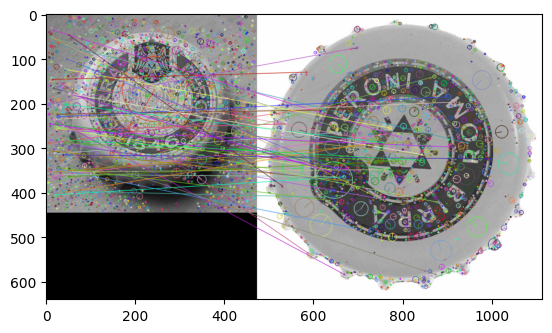

peroni2_hq.jpeg -> mercedes.jpg: 124


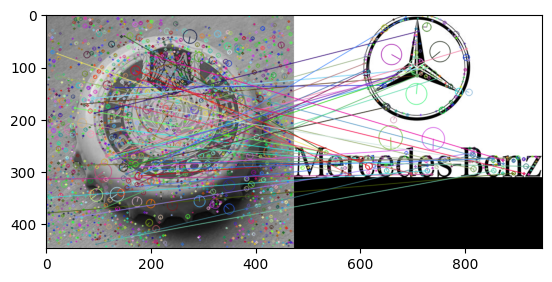

mercedes.jpg -> peroni.jpg: 93


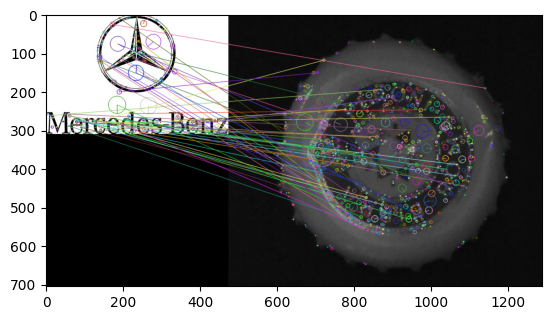

mercedes.jpg -> peroni_hq1.jpg: 113


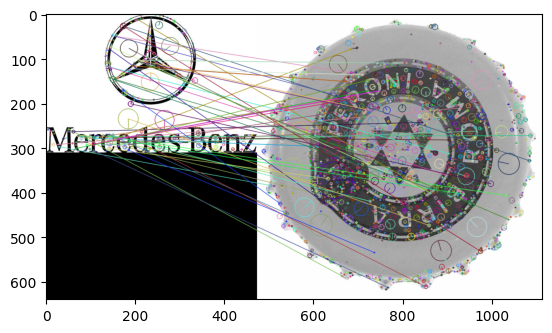

mercedes.jpg -> peroni2_hq.jpeg: 124


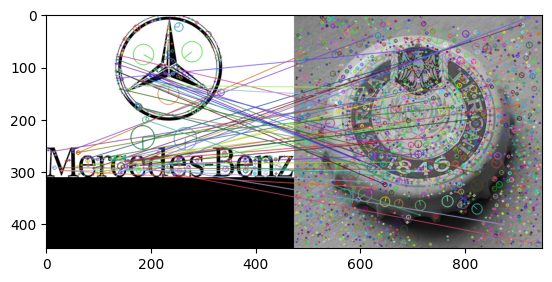

{'peroni.jpg': ['peroni_hq1.jpg', 'peroni2_hq.jpeg'], 'peroni_hq1.jpg': ['peroni.jpg', 'peroni2_hq.jpeg'], 'peroni2_hq.jpeg': ['peroni.jpg', 'peroni_hq1.jpg']}


In [3]:
images = ['../images/peroni.jpg', '../images/peroni_hq1.jpg', '../images/peroni2_hq.jpeg', '../images/mercedes.jpg']
computed_images = {}
duplicates = {}

sift_edge_threshold = 80
duplicate_descriptor_matches_threshold = 150

sift = cv2.SIFT_create(edgeThreshold=sift_edge_threshold)

f, axarr = plt.subplots(1, len(images), figsize=(15, 5))
f.suptitle("Original - grayscale", fontsize=15)
for i, path in enumerate(images):
    image = cv2.imread(path, 0)
     
    axarr[i].set_title(os.path.basename(path))
    axarr[i].imshow(image, cmap='gray')
     
plt.show()      

f, axarr = plt.subplots(1, len(images), figsize=(15, 5)) 
f.suptitle("Canny edge detection", fontsize=15)
for i, path in enumerate(images):    
    image = cv2.imread(path, 0)
    canny_image = cv2.Canny(image, 50, 50)
    
    axarr[i].set_title(os.path.basename(path))
    axarr[i].imshow(canny_image, cmap='gray')
        
    keypoints, descriptors = sift.detectAndCompute(canny_image, None)

    computed_images[os.path.basename(path)] = {
        'kp': keypoints,
        'ds': descriptors,
        'img': image
    }

plt.show()

bfMatcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

for image in computed_images.keys():
    filename = os.path.basename(image)

    similar_images = {image: {}}
    for img in computed_images.keys():
        if img == image:
            continue

        descriptor_matches = bfMatcher.match(computed_images[image]['ds'], computed_images[img]['ds'])

        print(f"{image} -> {img}: {len(descriptor_matches)}")
        matches = cv2.drawMatches(
            computed_images[image]['img'], 
            computed_images[image]['kp'],
            computed_images[img]['img'], 
            computed_images[img]['kp'],
            descriptor_matches[:50], 
            None, 
            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        plt.imshow(matches)
        plt.show() 

        # Discard if image is not similar enough
        if (len(descriptor_matches) < duplicate_descriptor_matches_threshold):
            continue

        similar_images[image][img] = {
            # 'm': img
            # 'matches': descriptor_matches
        }
        
    if (similar_images[image]):
        duplicates[image] = list(similar_images[image].keys())
        
print(duplicates)